# K-Nearest Neighbor

K-Nearest Neighbor atau disingkat K-NN adalah salah satu teknik dari Supervised Learning untuk klasifikasi. Teknik Machine learning pada umumnya mempelajari korelasi fitur-fitur dan target, namun algoritma ini model hanya mengingat persebaran titik point dari dataset saja. Oleh karena itu K-NN biasa disebut lazy algorithm.

Langkah-langkah K-NN:
1. Tentukan seberapa besar K neighbors
2. Pada data point yang akan di tes, tentukan jarak terdekat antara data point dengan data observasi sebanyak K
3. Hitung seberapa banyak neighbor pada tiap kategori yang terdekat dengan data tes
4. Klasifikasikan data point di kategori dimana neighbor-nya paling banyak.


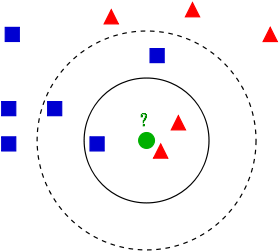

Ada beberapa cara untuk menghitung jarak pada tiap data. Yang paling umum digunakan adalah formula Euclidean distance

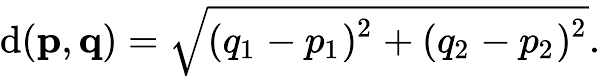

Kelebihan:
1. Tidak bias terhadap data
2. Algoritma yang mudah dimengerti
3. Akurasi yang cukup baik, namun kurang kompetitif dibandingkan teknik lainnya

Kekurangan
1. Sangat boros secara komputasi
2. Sensitif terhadap fitur yang kurang berguna.
3. Tidak scalable

# CODING SECTION
 
# Use Case

Sebuah perusahaan mobil berinisial AVZ ingin mendongkrak penjualan mereka untuk tahun 2019. Sebagai Data Scientist, kita diberikan dataset laporan hasil iklan mobil yang berisi dengan fitur ID, umur, gaji, dan record pembelian. Diharapkan kita mampu memberikan insight untuk meningkatkan kemungkinan customer akan membeli mobil tersebut atau tidak.

# Modelling

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing dataset
df = pd.read_csv('data_iklan.csv')

In [3]:
# Importing dataset
df = pd.read_csv('data_iklan.csv')

In [4]:
df.head(10)

,ID,Gender,Umur,Gaji,Pembelian
0,15624510,Pria,19,9,0
1,15810944,Pria,35,10,0
2,15668575,Wanita,26,21,0
3,15603246,Wanita,27,28,0
4,15804002,Pria,19,38,0
5,15728773,Pria,27,29,0
6,15598044,Wanita,27,42,0
7,15694829,Wanita,32,75,1
8,15600575,Pria,25,16,0
9,15727311,Wanita,35,32,0


In [5]:
# memisahkan dataset ke training dan test data
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:

# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [8]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 3, 29]], dtype=int64)

In [9]:
accuracy_score(y_test, y_pred)

0.93

# Visualisasi

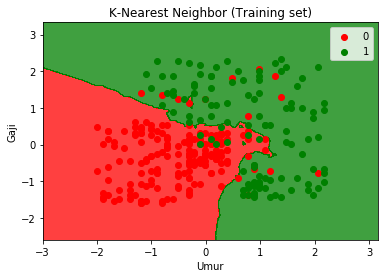

In [12]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-Nearest Neighbor (Training set)')
plt.xlabel('Umur')
plt.ylabel('Gaji')
plt.legend()
plt.show()

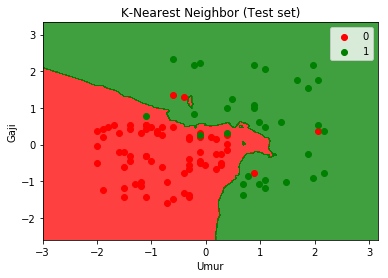

In [13]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-Nearest Neighbor (Test set)')
plt.xlabel('Umur')
plt.ylabel('Gaji')
plt.legend()
plt.show()

# KESIMPULAN

K-Nearest Neighbor adalah teknik umum untuk klasifikasi yang algoritmanya dihitung berdasarkan jarak antar datapoint. K-NN tidak mempelajari korelasi dan fungsi tiap-tiap fitur. K-NN butuh proses komputasi yang cukup lama, karena K-NN butuh menghitung jarak tiap-tiap datapoint yang terdapat pada test data. pemilihan K juga harus cermat, karena K yang kurang optimal dapat mempunyai resiko overfitting. Teknik Feature Scaling wajib dilakukan terlebih dahulu sebelum modelling agar perhitungan jarak bisa dihasilkan secara optimal
